In [1]:
using DifferentialEquations, Plots

g = 9.79 # Gravitational constants
L = 1.00 # Length of the pendulum

#Initial Conditions
u₀ = [0, π / 60] # Initial speed and initial angle
tspan = (0.0, 6.3) # time domain

#Define the problem
function simplependulum(du, u, p, t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*θ
end

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-6);

┌ Info: Recompiling stale cache file /home/pnavaro/.julia/compiled/v1.2/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1240


Analytic solution

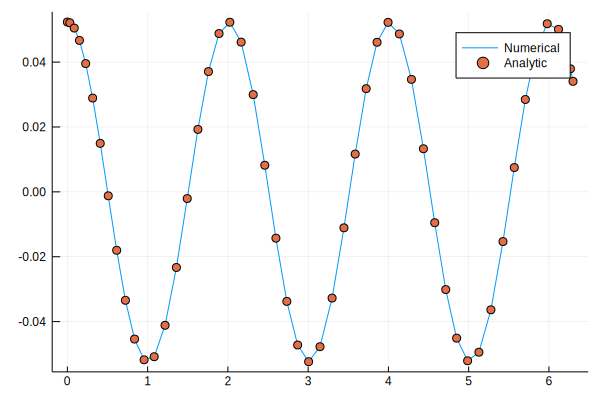

In [2]:
u = u₀[2] .* cos.(sqrt(g / L) .* sol.t)

plot(sol.t, getindex.(sol.u, 2), label = "Numerical")
scatter!(sol.t, u, label = "Analytic")

[Numbers with Uncertainties](http://tutorials.juliadiffeq.org/html/type_handling/02-uncertainties.html)

In [3]:
using Measurements

g = 9.79 ± 0.02; # Gravitational constants
L = 1.00 ± 0.01; # Length of the pendulum

#Initial Conditions
u₀ = [0 ± 0, π / 60 ± 0.01] # Initial speed and initial angle

#Define the problem
function simplependulum(du, u, p, t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*θ
end

#Pass to solvers
prob = ODEProblem(simplependulum, u₀, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-6);
nothing # hide

Analytic solution

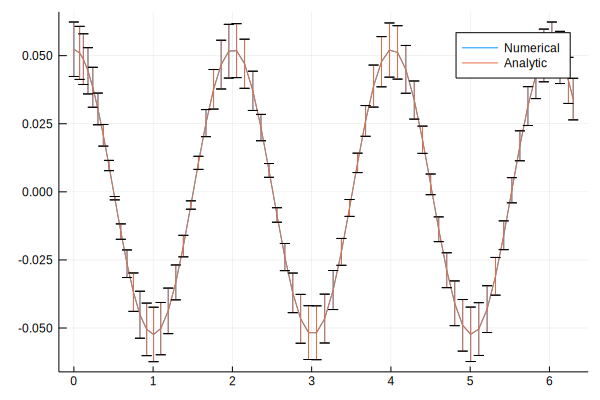

In [4]:
u = u₀[2] .* cos.(sqrt(g / L) .* sol.t)

plot(sol.t, getindex.(sol.u, 2), label = "Numerical")
plot!(sol.t, u, label = "Analytic")

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*